In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import time
from preprocessing import *

[3060 3060 3060 ... 5100 5100 5100] [ 669 2815]


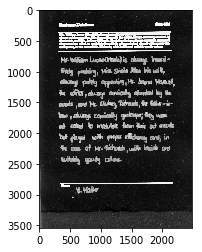

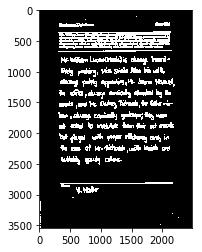

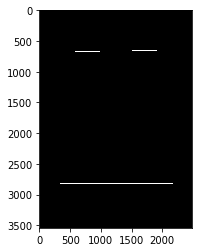

0.5186100006103516


In [2]:
img = cv2.imread('forms/c03-094a.png', 0)

t1 = time.time()
invert, thr, lines, rows, peaks = cutHandWriting(img)
t2 = time.time()

print(rows, peaks)
plt.imshow(invert, 'gray')
plt.show()
plt.imshow(thr, 'gray')
plt.show()
plt.imshow(lines, 'gray')
plt.show()
print(t2-t1)

In [3]:
rows

array([3060, 3060, 3060, ..., 5100, 5100, 5100], dtype=uint32)

In [4]:
peaks, _ = find_peaks(rows, height=10, distance=50)


In [5]:
peaks

array([ 669, 2815], dtype=int64)